In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(575, 575, 3)
(800, 1500, 3)


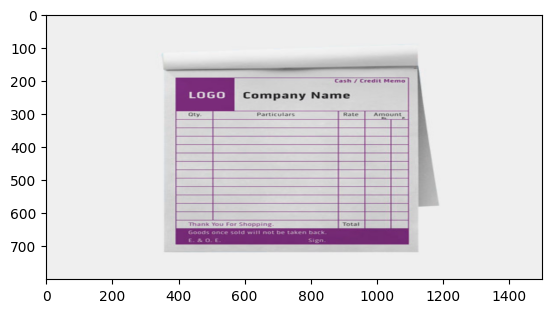

In [46]:
im_path ="/content/bill.jpg"
img = cv2.imread(im_path)
print(img.shape)

img = cv2.resize(img,(1500,800))
print(img.shape)

plt.imshow(img)
plt.show()

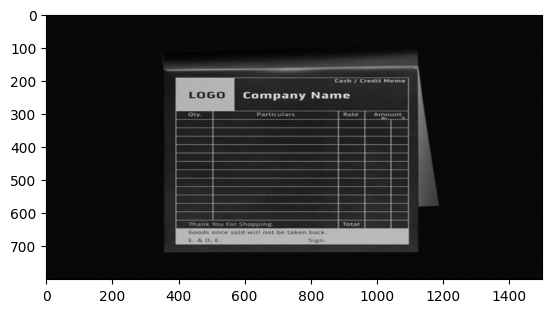

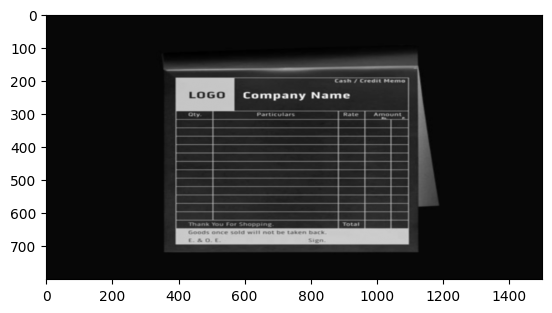

In [47]:
#remove the noise
orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="binary")
plt.show()

blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap="binary")
plt.show()

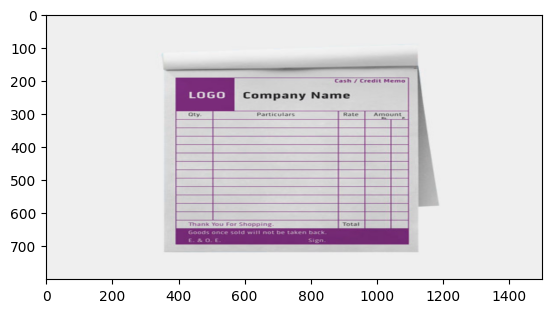

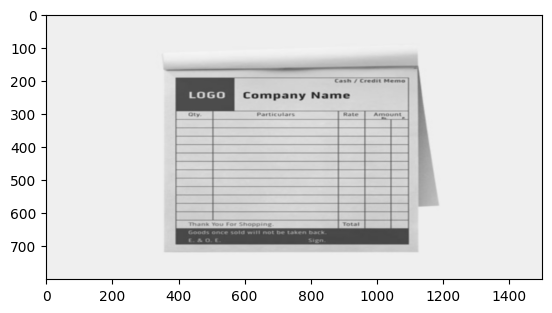

In [48]:
regen = cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

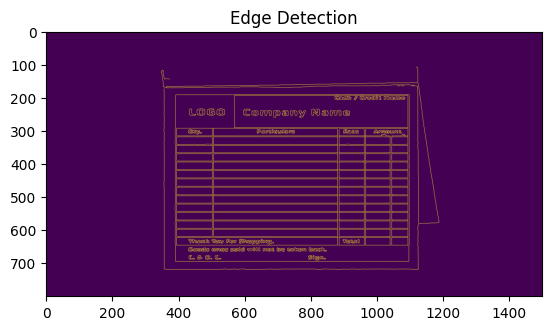

In [49]:
##Edge detection

edge = cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [50]:
## Contours Extraction
contours , hierarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours,reverse=True,key=cv2.contourArea)

456


In [51]:
## select the best contour region

for c in contours:
  p = cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,0.01*p,True)

  if len(approx) == 4:
    target = approx
    break
print(target.shape)

(4, 1, 2)


In [52]:
## reorder target contour

def reorder(h):
  h=h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2),dtype=np.float32)

  add=h.sum(axis=1)
  hnew[0]=h[np.argmin(add)] # top-left has the smallest sum
  hnew[2]=h[np.argmax(add)] # bottom-right has the largest sum

  diff=np.diff(h,axis=1)
  hnew[1]=h[np.argmin(diff)] # top-right has the smallest difference
  hnew[3]=h[np.argmax(diff)] # bottom-left has the largest difference

  return hnew

In [53]:
reorder = reorder(target)
print("*****")
print(reorder)

[[ 392  192]
 [ 392  695]
 [1097  694]
 [1098  192]]
*****
[[ 392.  192.]
 [1098.  192.]
 [1097.  694.]
 [ 392.  695.]]


In [54]:
## project to a fixed screen

input_representation = reorder
output_map=np.float32([[0,0],[800,0],[800,800],[0,800]])

In [55]:
M = cv2.getPerspectiveTransform(input_representation,output_map)
ans=cv2.warpPerspective(orig , M , (800,800))

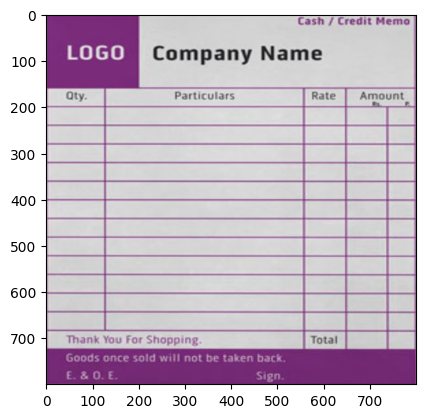

In [56]:
plt.imshow(ans)
plt.show()

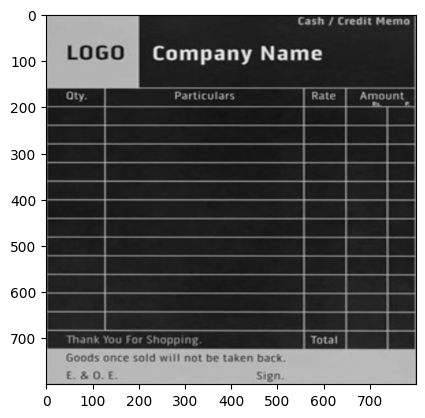

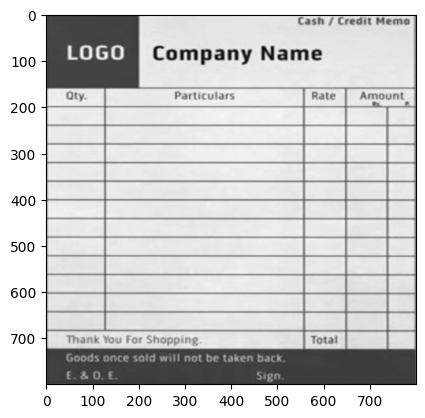

In [60]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

b_res = cv2.GaussianBlur(res,(3,3),0)

plt.imshow(res,cmap="binary")
plt.show()

plt.imshow(b_res,cmap="gray")
plt.show()